In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv("data.csv")
df.shape

(569, 33)

In [2]:
df = df.drop(["id", "Unnamed: 32"],axis=1)
diagnosis = {'M': 1, 'B': 0}
df["diagnosis"] = df["diagnosis"].map(diagnosis)
df
df.eq(0).sum()
mean_con = df[df['concavity_mean'] != 0]['concavity_mean'].mean()
mean_con_m = df[df['concave points_mean'] != 0]['concave points_mean'].mean()
mean_con_se = df[df['concavity_se'] != 0]['concavity_se'].mean()
mean_con_m_se = df[df['concave points_se'] != 0]['concave points_se'].mean()
mean_con_w = df[df['concavity_worst'] != 0]['concavity_worst'].mean()
mean_con_m_w = df[df['concave points_worst'] != 0]['concave points_worst'].mean()

df['concavity_mean'].replace(0, mean_con, inplace=True)
df['concave points_mean'].replace(0, mean_con_m, inplace=True)
df['concavity_se'].replace(0, mean_con_se, inplace=True)
df['concave points_se'].replace(0, mean_con_m_se, inplace=True)
df['concavity_worst'].replace(0, mean_con_w, inplace=True)
df['concave points_worst'].replace(0, mean_con_m_w, inplace=True)

In [3]:
corr = df.corr()

In [4]:
x = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

In [6]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=4)
selector.fit(x_train, y_train)
scores = -np.log(selector.pvalues_)

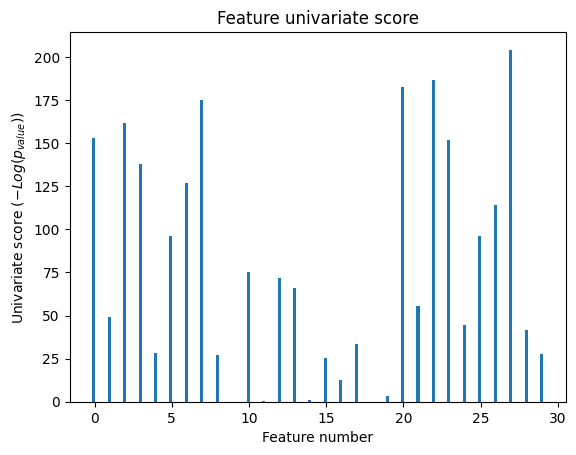

In [7]:
#Univariate Feature Selection
X_indices = np.arange(x.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

In [8]:
#Correlation with output
corr_target = abs(corr["diagnosis"])
relevant_features = corr_target[corr_target>0.5]
print(relevant_features)

diagnosis               1.000000
radius_mean             0.730029
perimeter_mean          0.742636
area_mean               0.708984
compactness_mean        0.596534
concavity_mean          0.686318
concave points_mean     0.768315
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
radius_worst            0.776454
perimeter_worst         0.782914
area_worst              0.733825
compactness_worst       0.590998
concavity_worst         0.649154
concave points_worst    0.790797
Name: diagnosis, dtype: float64


In [9]:
p1 = df.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
p2 = df.radius_mean.cov(df.area_mean)/(df.radius_mean.std()*df.area_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
Pearson correlation:  0.9873571700566126


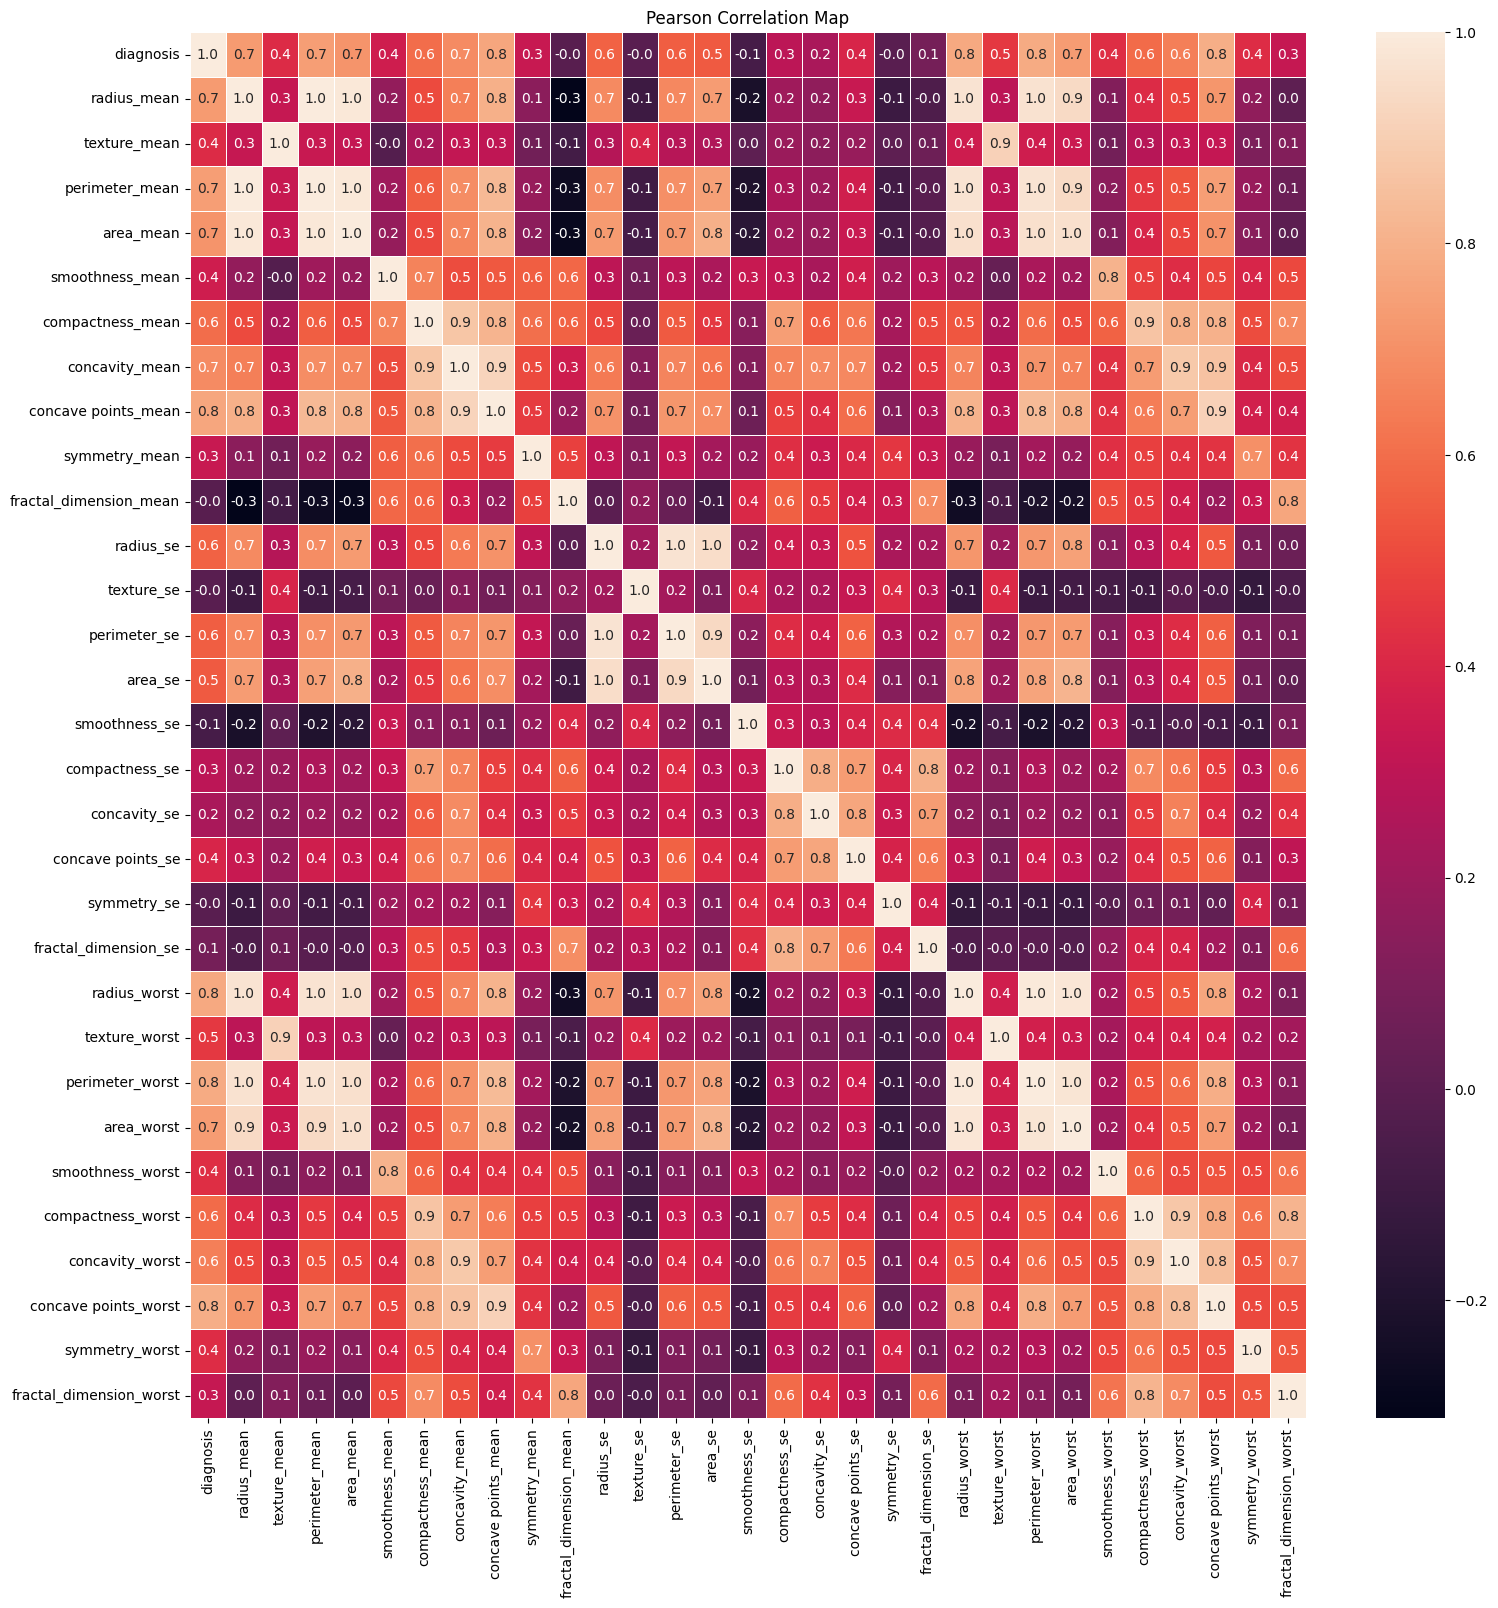

In [10]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df.corr(method='pearson'),annot= True,linewidths=0.6,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Pearson Correlation Map')
plt.show()

In [11]:
from scipy import stats
statistic, p_value = stats.ttest_rel(df.radius_mean,df.area_mean)
print('p-value: ',p_value)
#Since the result is almost 0 we can reject the null hypothesis for radius_mean and area_mean

p-value:  1.5253492492559045e-184
